## Predict stock price using LSTM model. 

load the data and inspect them

In [65]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


split the data into training and test sets 

In [66]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

## A standard model

## Lag: 1, Hidden Layers: 4, Dropout Rate: 0.2

1 day

In [67]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(740, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.2

In [68]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0669
Epoch 2/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0166
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0128
Epoch 4/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0117
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0113
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0116
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0110
Epoch 8/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0108
Epoch 9/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0103
Epoch 10/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0103
Epoch 11/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0092
Epoch 12/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0098
Epoch 13/100
24/24 [=====

In [69]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [70]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

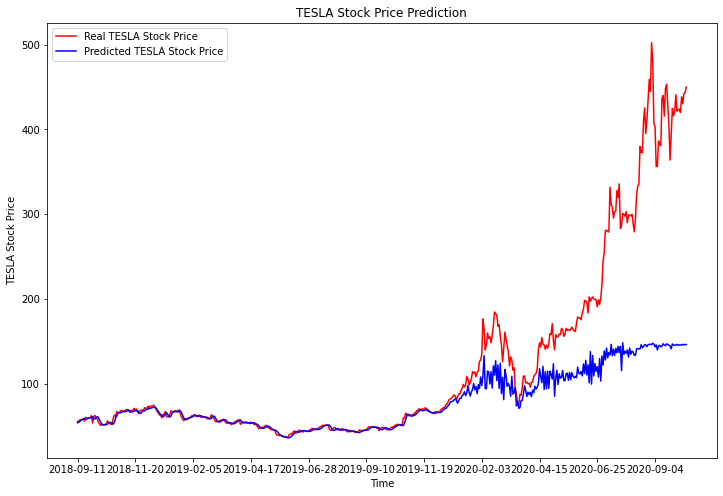

In [71]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 7, Hidden Layers: 4, Dropout Rate: 0.2

7 day

In [72]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(106, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.2

In [73]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2964
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0624
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0339
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0339
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0260
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0189
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0173
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0180
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0156
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 13/100
4/4 [==============================]

In [74]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [75]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

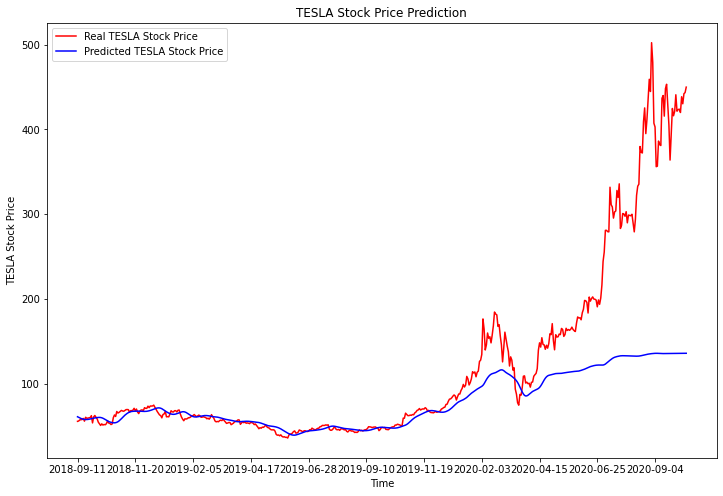

In [76]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 14, Hidden Layers: 4, Dropout Rate: 0.2

14 day

In [78]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(53, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.2

In [79]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3266
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1845
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0546
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0556
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0427
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0301
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0277
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 13/100
2/2 [==============================] - 0s

In [80]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [81]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

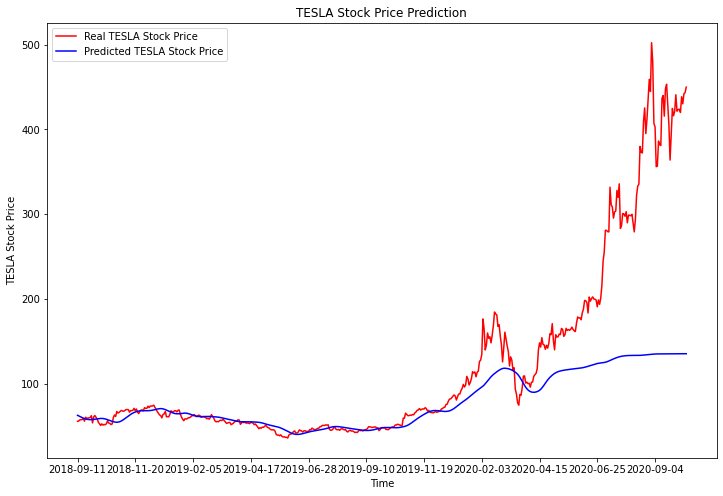

In [82]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Comparison 1: 4 vs 6 hidden layer

## Lag: 1, Hidden Layers: 6, Dropout Rate: 0.2

1 day

In [83]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(740, 60, 1)

Build LSTM mode, with 50 neurons and 6 layers, droupout rate = 0.2

In [84]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 22ms/step - loss: 0.0686
Epoch 2/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0196
Epoch 3/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0168
Epoch 4/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0196
Epoch 5/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0155
Epoch 6/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0151
Epoch 7/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0158
Epoch 8/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0138
Epoch 9/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0137
Epoch 10/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0139
Epoch 11/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0128
Epoch 12/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0125
Epoch 13/100
24/24 [=====

In [85]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [86]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

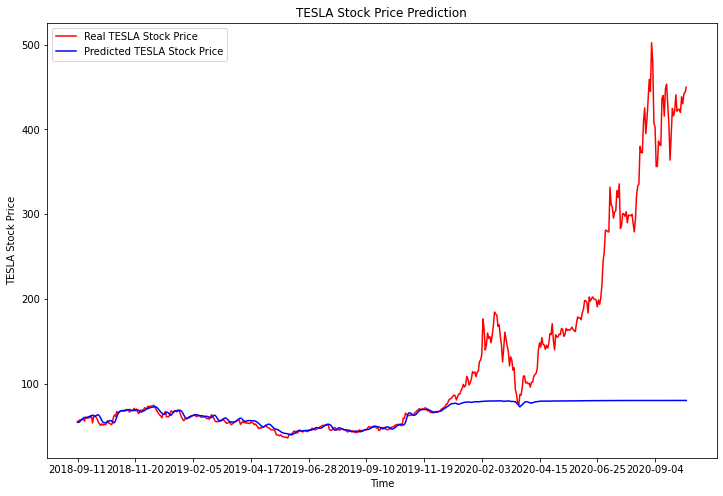

In [87]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 7, Hidden Layers: 6, Dropout Rate: 0.2

7 day

In [88]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(106, 60, 1)

Build LSTM mode, with 50 neurons and 6 layers, droupout rate = 0.2

In [89]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 21ms/step - loss: 0.2713
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0609
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0301
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0420
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0351
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0225
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0211
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0164
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0172
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0156
Epoch 11/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0149
Epoch 12/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0150
Epoch 13/100
4/4 [==============================]

In [90]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [91]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

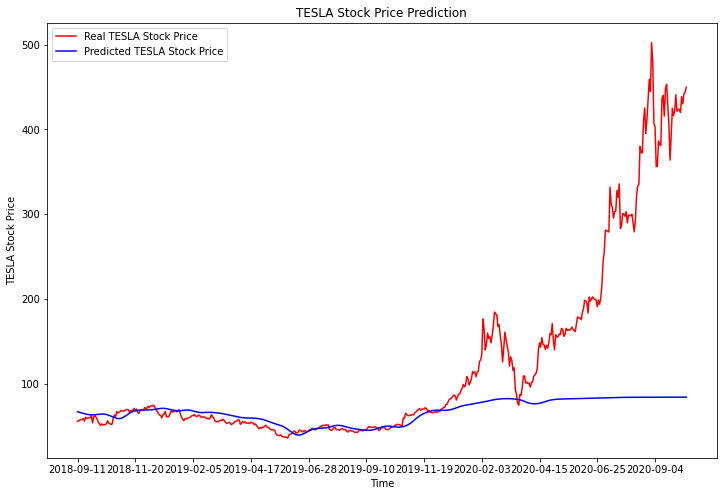

In [92]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 14, Hidden Layers: 6, Dropout Rate: 0.2

14 day

In [94]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(53, 60, 1)

Build LSTM mode, with 50 neurons and 6 layers, droupout rate = 0.2

In [95]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 0.2775
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0954
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0870
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0343
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0364
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0500
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0330
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0316
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0307
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0320
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0217
Epoch 12/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 13/100
2/2 [==============================]

In [96]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [97]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

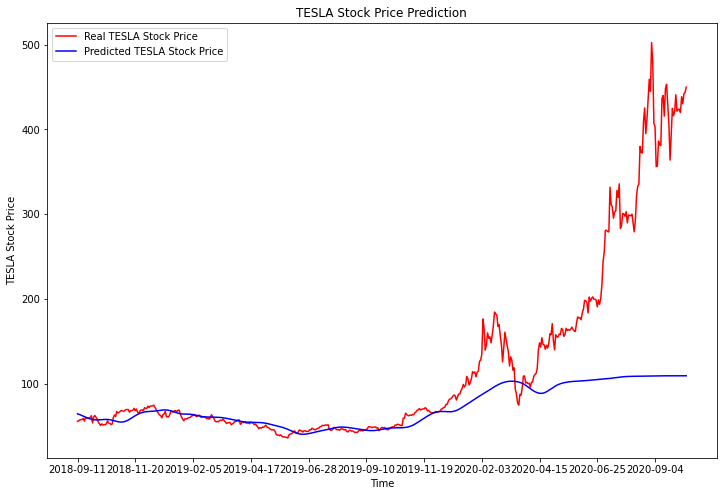

In [98]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Comparison 2: 0.2 vs 0.5 dropout rate

## Lag: 1, Hidden Layers: 4, Dropout Rate: 0.5

1 day

In [99]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(740, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.5

In [100]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0655
Epoch 2/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0248
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0214
Epoch 4/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0220
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0209
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0213
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0189
Epoch 8/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0181
Epoch 9/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0162
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0179
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 12/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0145
Epoch 13/100
24/24 [=====

In [101]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [102]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

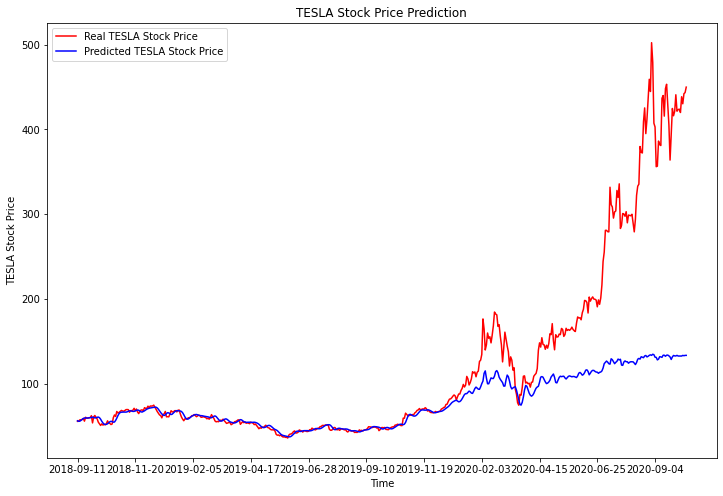

In [103]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 7, Hidden Layers: 4, Dropout Rate: 0.5

7 day

In [105]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(106, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.5

In [106]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2464
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0723
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0263
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0591
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0401
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0328
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0323
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0299
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0310
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0256
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0295
Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0228
Epoch 13/100
4/4 [==============================]

In [107]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [108]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

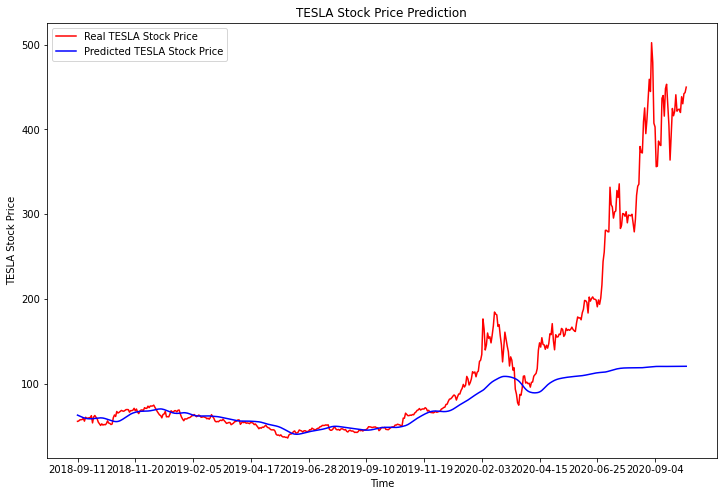

In [109]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 14, Hidden Layers: 4, Dropout Rate: 0.5

14 day

In [111]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(53, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.5

In [112]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3063
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2073
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0981
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0428
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0940
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0378
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0776
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0386
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0386
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0463
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0305
Epoch 13/100
2/2 [==============================] - 0s 8

In [113]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [114]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

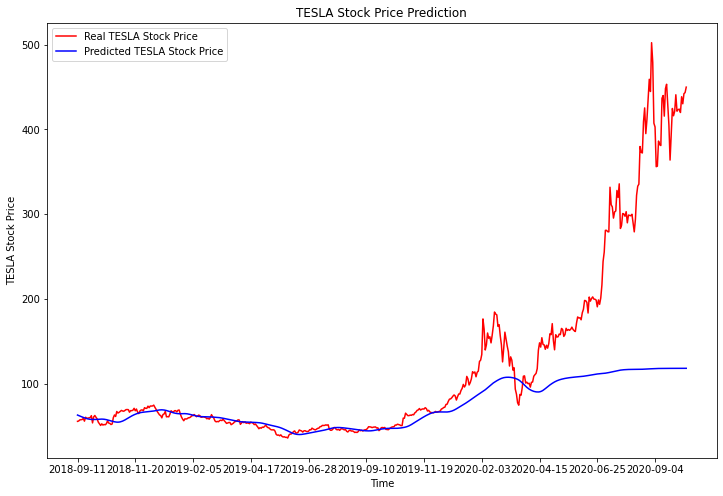

In [115]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()